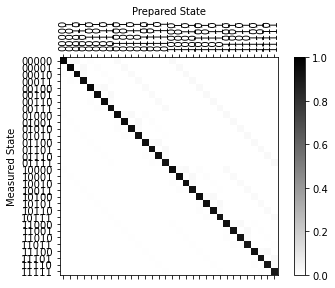

In [1]:
from qiskit import execute
from qiskit.test.mock import FakeVigo
import qiskit.ignis.mitigation as mit

backend = FakeVigo()
num_qubits = backend.configuration().num_qubits

# Generate calibration circuits
circuits, metadata = mit.expval_meas_mitigator_circuits(
    num_qubits, method='tensored')
result = execute(circuits, backend, shots=8192).result()

# Fit mitigator
mitigator = mit.ExpvalMeasMitigatorFitter(result, metadata).fit()

# Plot fitted N-qubit assignment matrix
mitigator.plot_assignment_matrix()

In [2]:
from qiskit import QuantumCircuit

# Test Circuit with expectation value -1.
qc = QuantumCircuit(num_qubits)
qc.x(range(num_qubits))
qc.measure_all()

# Execute
shots = 8192
seed_simulator = 1999
result = execute(qc, backend, shots=8192, seed_simulator=1999).result()
counts = result.get_counts(0)

# Expectation value of Z^N without mitigation
expval_nomit, error_nomit = mit.expectation_value(counts)
print('Expval (no mitigation): {:.2f} ± {:.2f}'.format(
    expval_nomit, error_nomit))

# Expectation value of Z^N with mitigation
expval_mit, error_mit = mit.expectation_value(counts,
    meas_mitigator=mitigator)
print('Expval (with mitigation): {:.2f} ± {:.2f}'.format(
    expval_mit, error_mit))

Expval (no mitigation): -0.81 ± 0.01
Expval (with mitigation): -1.00 ± 0.01
